# MNIST Fashion recognition using Neural Network

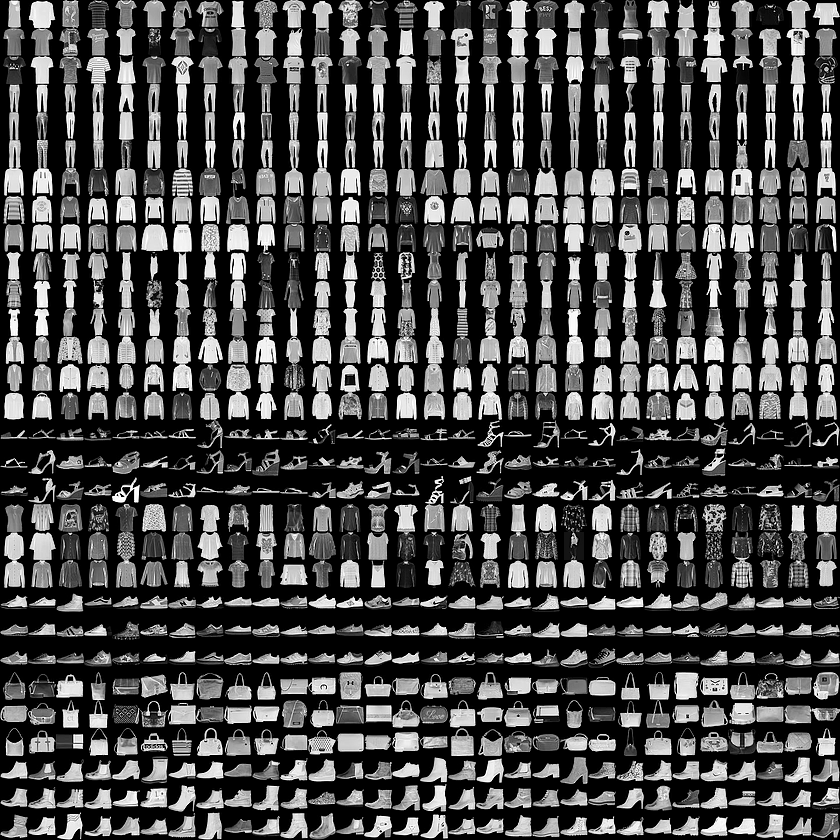

_Fashion-MNIST is a dataset of images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes which are:_

_0 - T-shirt/top_

_1 - Trouser_

_2 - Pullover_

_3 - Dress_

_4 - Coat_

_5 - Sandal_

_6 - Shirt_

_7 - Sneaker_

_8 - Bag_

_9 - Ankle boot_
***

## Importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

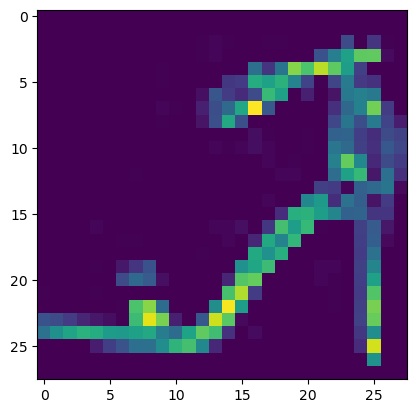

In [10]:
plt.imshow(X_train[8])

In [11]:
fashion = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 
          9:"Ankle boot"}

In [12]:
y_train[8]

5

In [13]:
fashion[y_train[8]]

'Sandal'

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04313725, 0.55686275, 0.78431373,
        0.41568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.7254902 ,
        0.43921569, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.59607843, 0.83921569, 0.85098039, 0.76078431,
        0.9254902 , 0.84705882, 0.73333333, 0.58431373, 0.52941176,
        0.6       , 0.82745098, 0.85098039, 0.90588235, 0.80392157,
        0.85098039, 0.7372549 , 0.13333333, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25882353, 0.7254902 , 0.65098039, 0.70588235, 0.70980392,
        0.74509804, 0.82745098, 0.86666667, 0.77254902, 0.57254902,
        0.77647059, 0.8078

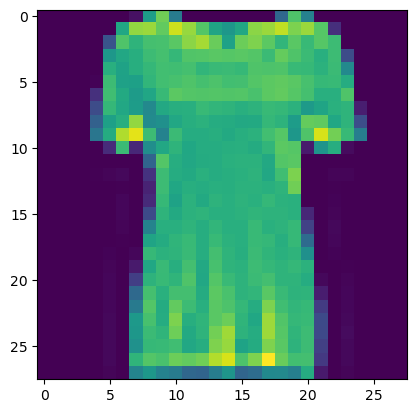

In [16]:
plt.imshow(X_train[10])

In [17]:
y_train[10]

0

In [18]:
fashion[y_train[10]]

'T-shirt/top'

## Model

* ### NN without any hidden layer

In [19]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5975 - accuracy: 0.7985
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4619 - accuracy: 0.8417
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4360 - accuracy: 0.8504
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4211 - accuracy: 0.8546
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4147 - accuracy: 0.8559
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4070 - accuracy: 0.8593
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4033 - accuracy: 0.8597
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3965 - accuracy: 0.8627
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3954 - accuracy: 0.8620
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.391

In [22]:
training_loss,training_acc=model.evaluate(X_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3997 - accuracy: 0.8597


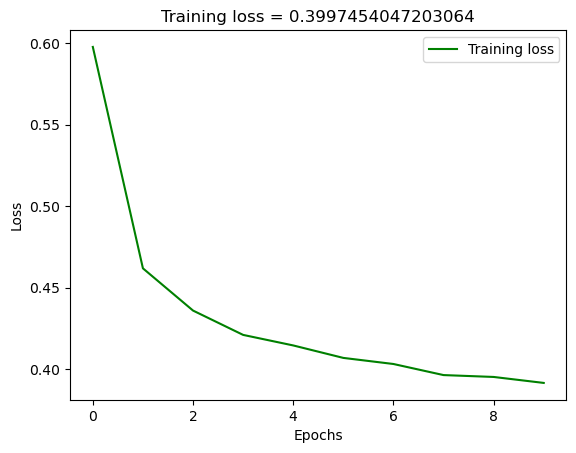

In [23]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title(f'Training loss = {training_loss}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

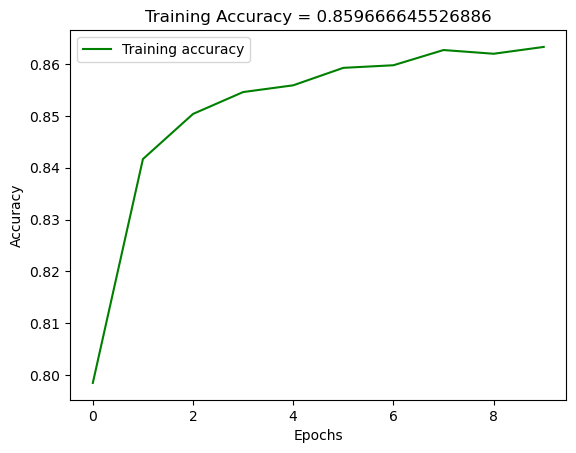

In [24]:
plt.plot(history.epoch, history.history["accuracy"], 'g', label='Training accuracy')
plt.title(f'Training Accuracy = {training_acc}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
loss,accuracy=model.evaluate(X_test,y_test)
print("Loss =",loss)
print("Accuracy =",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4612 - accuracy: 0.8389
Loss = 0.4611578583717346
Accuracy = 0.8389000296592712


In [26]:
y_pred=model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[6.5460021e-04, 2.0001162e-05, 1.1243205e-02, ..., 9.8055911e-01,
        8.3909810e-01, 9.9880975e-01],
       [3.8991664e-02, 8.5467937e-06, 9.0983784e-01, ..., 4.2250134e-27,
        9.9782378e-04, 1.9475572e-16],
       [8.3508253e-01, 9.9998945e-01, 2.5273979e-01, ..., 1.1078772e-11,
        8.1736874e-03, 3.6109249e-08],
       ...,
       [7.5396836e-01, 1.3268150e-04, 6.9649704e-02, ..., 5.8722486e-05,
        9.6762401e-01, 1.0346301e-06],
       [1.3326821e-01, 9.9997699e-01, 8.1259988e-02, ..., 4.6506546e-08,
        2.9989390e-03, 2.3307276e-03],
       [7.3595424e-03, 2.8655231e-03, 7.2146334e-02, ..., 7.1208906e-01,
        5.5798638e-01, 6.4939611e-02]], dtype=float32)

In [27]:
y_pred[5]

array([8.71061862e-01, 9.99722600e-01, 2.32111827e-01, 3.49152446e-01,
       6.60075426e-01, 2.56425306e-12, 2.05296017e-02, 1.32864445e-14,
       1.18974294e-03, 9.43564604e-09], dtype=float32)

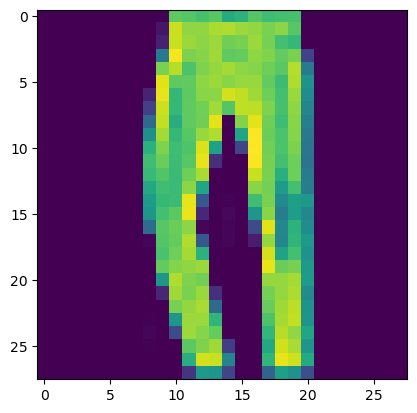

In [28]:
plt.imshow(X_test[5])

In [29]:
np.argmax(y_pred[5])

1

In [30]:
fashion[np.argmax(y_pred[5])]

'Trouser'

In [31]:
y_test[5]

1

In [32]:
fashion[y_test[5]]

'Trouser'

In [33]:
y_pred_label=[np.argmax(val) for val in y_pred]
y_pred_label[:5]

[9, 2, 1, 1, 6]

In [34]:
fash=[fashion[val] for val in y_pred_label[:5]]
fash

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']

In [35]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_label)
print("Recall =",metric.result().numpy())

Recall = 0.97366667


In [36]:
m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred_label)
print("Precision =",m.result().numpy())

Precision = 0.98217887


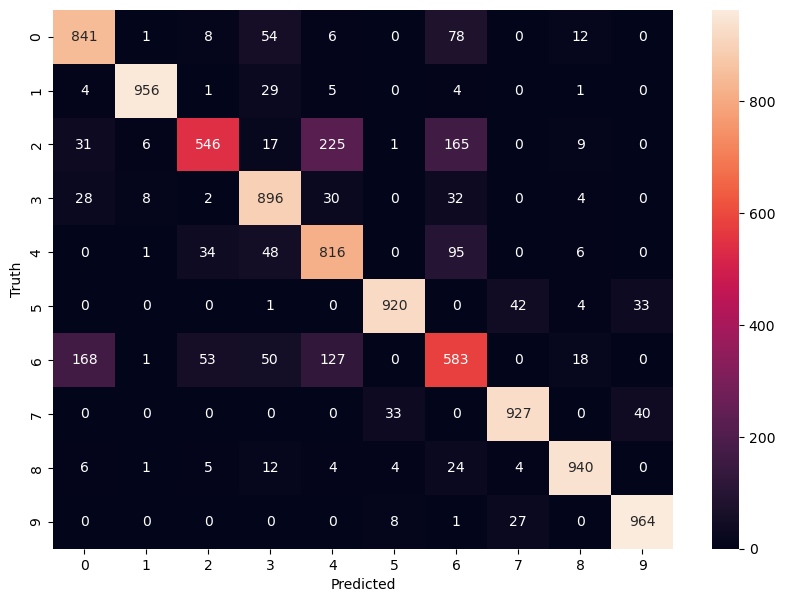

In [37]:
cm = tf.math.confusion_matrix(y_test,y_pred_label)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

* ### NN with 1 hidden layer

In [38]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(150,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 150)               117750    
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119260 (465.86 KB)
Trainable params: 119260 (465.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5357 - accuracy: 0.8161
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3900 - accuracy: 0.8595
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3516 - accuracy: 0.8730
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3262 - accuracy: 0.8811
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3066 - accuracy: 0.8878
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2913 - accuracy: 0.8928
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2768 - accuracy: 0.8980
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2558 - accuracy: 0.9050
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.245

In [41]:
training_loss,training_acc=model.evaluate(X_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2422 - accuracy: 0.9101


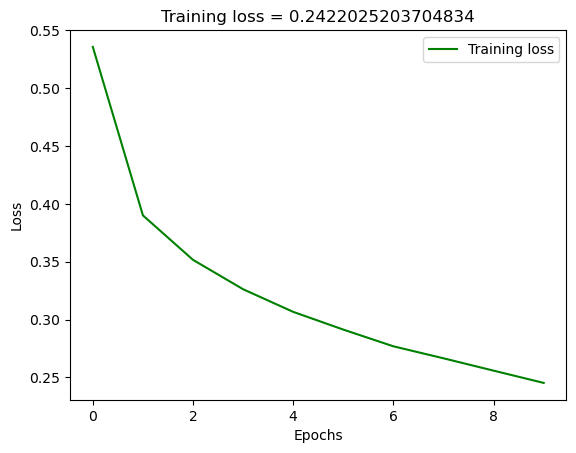

In [42]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title(f'Training loss = {training_loss}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

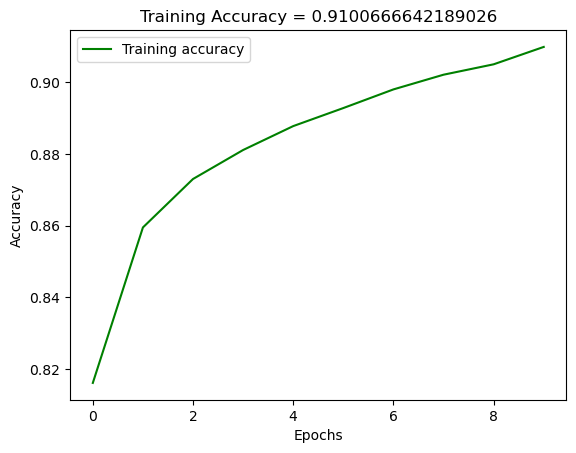

In [43]:
plt.plot(history.epoch, history.history["accuracy"], 'g', label='Training accuracy')
plt.title(f'Training Accuracy = {training_acc}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
loss,accuracy=model.evaluate(X_test,y_test)
print("Loss =",loss)
print("Accuracy =",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8792
Loss = 0.34107208251953125
Accuracy = 0.8791999816894531


In [45]:
y_pred=model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.7713503e-05, 4.6505187e-07, 2.9968091e-06, ..., 2.5407832e-02,
        4.6229263e-05, 9.2984182e-01],
       [2.8114818e-04, 1.1326824e-07, 9.9610364e-01, ..., 1.5314608e-08,
        1.6585393e-07, 3.0502993e-09],
       [3.8143153e-05, 9.9993277e-01, 1.6727669e-06, ..., 8.1023979e-09,
        2.0625704e-07, 7.6838542e-11],
       ...,
       [7.2722314e-03, 2.2111151e-07, 1.1013657e-03, ..., 5.0750445e-05,
        9.7734809e-01, 2.7383644e-08],
       [9.0066760e-06, 9.9971932e-01, 3.9999636e-06, ..., 1.1600218e-08,
        2.7290352e-07, 1.7281671e-08],
       [1.6114340e-07, 5.9253878e-08, 1.0519120e-06, ..., 3.1527659e-04,
        1.3718009e-05, 9.7028874e-08]], dtype=float32)

In [46]:
y_pred[0]

array([1.7713503e-05, 4.6505187e-07, 2.9968091e-06, 1.1508252e-05,
       6.2840531e-06, 4.4646941e-02, 1.8202456e-05, 2.5407832e-02,
       4.6229263e-05, 9.2984182e-01], dtype=float32)

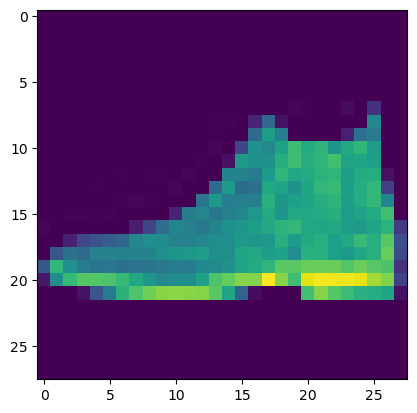

In [47]:
plt.imshow(X_test[0])

In [48]:
np.argmax(y_pred[0])

9

In [49]:
fashion[np.argmax(y_pred[0])]

'Ankle boot'

In [50]:
y_test[0]

9

In [51]:
fashion[y_test[0]]

'Ankle boot'

In [52]:
y_pred_label=[np.argmax(val) for val in y_pred]
y_pred_label[:8]

[9, 2, 1, 1, 6, 1, 4, 6]

In [53]:
fash=[fashion[val] for val in y_pred_label[:8]]
fash

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt']

In [54]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_label)
print("Recall =",metric.result().numpy())

Recall = 0.9765555


In [55]:
m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred_label)
print("Precision =",m.result().numpy())

Precision = 0.98619837


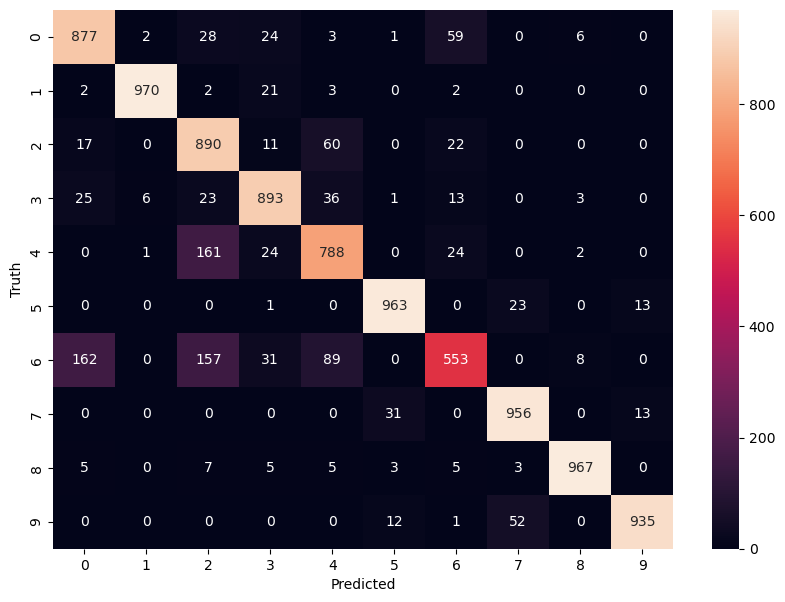

In [56]:
cm = tf.math.confusion_matrix(y_test,y_pred_label)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

* ### NN with 2 hidden layer

In [57]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(80,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               157000    
                                                                 
 dense_4 (Dense)             (None, 80)                16080     
                                                                 
 dense_5 (Dense)             (None, 10)                810       
                                                                 
Total params: 173890 (679.26 KB)
Trainable params: 173890 (679.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
history=model.fit(X_train,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4959 - accuracy: 0.8280
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3572 - accuracy: 0.8696
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3189 - accuracy: 0.8824
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2968 - accuracy: 0.8892
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2777 - accuracy: 0.8968
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2622 - accuracy: 0.9027
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2499 - accuracy: 0.9064
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2386 - accuracy: 0.9117
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2283 - accuracy: 0.9143
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

In [60]:
training_loss,training_acc=model.evaluate(X_train,y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.1648 - accuracy: 0.9390


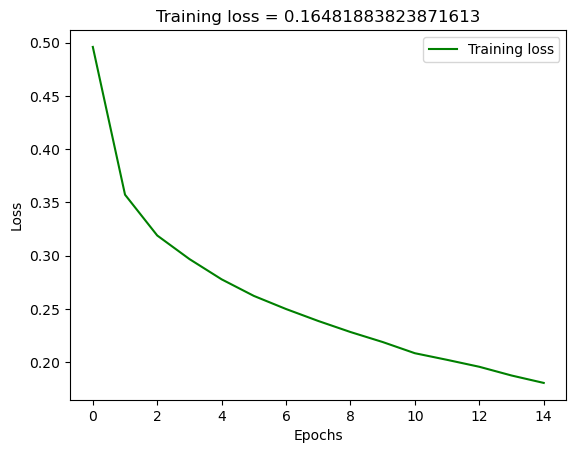

In [61]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title(f'Training loss = {training_loss}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

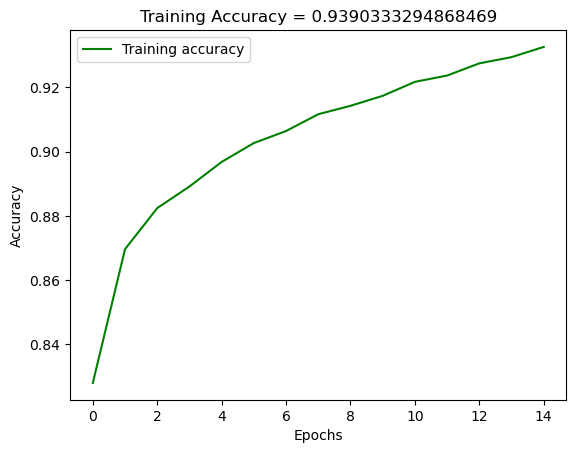

In [62]:
plt.plot(history.epoch, history.history["accuracy"], 'g', label='Training accuracy')
plt.title(f'Training Accuracy = {training_acc}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
loss,acc=model.evaluate(X_test,y_test)
print("Loss =",loss)
print("Accuracy =",accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.8910
Loss = 0.3210184872150421
Accuracy = 0.8791999816894531


In [64]:
y_pred=model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[8.1701623e-03, 8.0075784e-04, 6.9273345e-04, ..., 8.1164509e-01,
        6.8705878e-04, 9.9990588e-01],
       [5.6901211e-01, 2.4719695e-06, 9.9830997e-01, ..., 6.6511340e-05,
        1.1013136e-04, 5.6629815e-06],
       [1.6989356e-01, 9.9996680e-01, 4.7656354e-03, ..., 9.5443590e-07,
        5.1918067e-04, 7.6974444e-05],
       ...,
       [6.3428506e-02, 1.0380545e-05, 1.2538971e-01, ..., 3.8496584e-02,
        9.9955577e-01, 3.9381550e-05],
       [3.4309182e-02, 9.9995649e-01, 5.6505795e-03, ..., 2.8736990e-06,
        3.6135970e-03, 1.5206840e-04],
       [1.6943926e-03, 3.5263522e-04, 1.3829218e-03, ..., 2.0585321e-01,
        5.9849420e-04, 2.4662784e-04]], dtype=float32)

In [65]:
y_pred[9]

array([3.2277207e-03, 1.3083570e-03, 4.3479292e-04, 5.6995083e-05,
       8.8105869e-04, 1.5378752e-01, 2.4268103e-03, 9.9967176e-01,
       3.1526468e-03, 1.1547783e-01], dtype=float32)

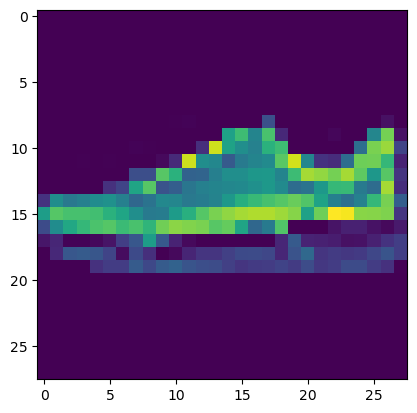

In [66]:
plt.imshow(X_test[9])

In [67]:
np.argmax(y_pred[9])

7

In [68]:
fashion[np.argmax(y_pred[9])]

'Sneaker'

In [69]:
y_test[9]

7

In [70]:
fashion[y_test[9]]

'Sneaker'

In [71]:
y_pred_label=[np.argmax(val) for val in y_pred]
y_pred_label[:8]

[9, 2, 1, 1, 6, 1, 4, 6]

In [72]:
fash=[fashion[val] for val in y_pred_label[:8]]
fash

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt']

In [73]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_label)
print("Recall =",metric.result().numpy())

Recall = 0.9808889


In [74]:
metric = tf.keras.metrics.Precision()
metric.update_state(y_test, y_pred_label)
print("Precision =",metric.result().numpy())

Precision = 0.98438895


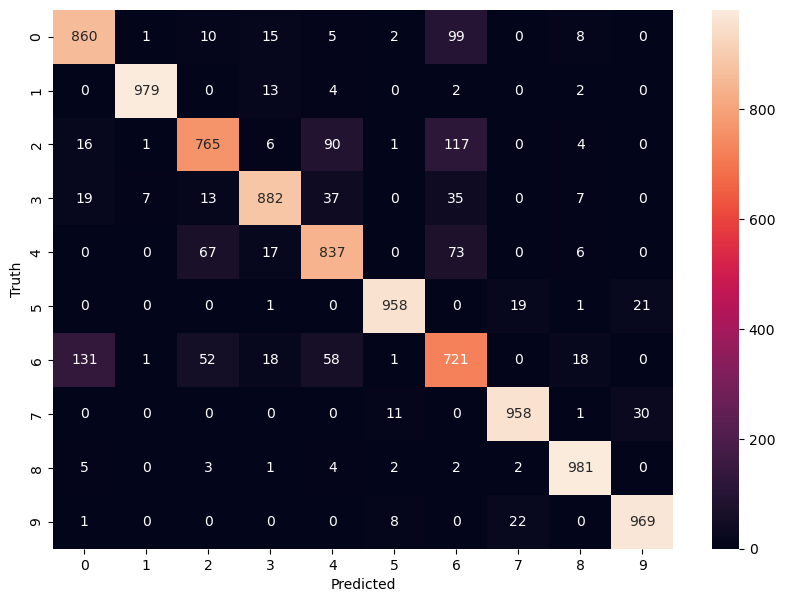

In [75]:
cm = tf.math.confusion_matrix(y_test,y_pred_label)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()